<a href="https://colab.research.google.com/github/drksrao/PREPROCESSING/blob/main/DWM_LAB_EXP_5_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

#Importing dataset
df = pd.read_csv("/content/drive/MyDrive/data.csv")
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10   France  37.0  67000.0       Yes


In [ ]:
#OBTAIN DEPENDENT AND INDEPENDANT VARIABLES
X = df.iloc[:,[0,1,2]].values# INDEPENDENT VAR
y = df.iloc[:,3].values # DEPENDENT VAR
print(X)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes']


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 64100.0]
 ['France' 35.0 58000.0]
 ['Spain' 38.6 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['France' 37.0 67000.0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)
X = np.array(X)
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 64100.0]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.6 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1 1]


In [ ]:
#Let’s implement the same in Python.

#Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (8, 5)
X_test.shape:  (3, 5)
y_train.shape:  (8,)
y_test.shape:  (3,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)
print(X_test)

[[ 1.         -0.37796447 -0.77459667 -0.38757755  0.17087153]
 [-1.         -0.37796447  1.29099445 -0.15790197 -1.11066496]
 [-1.         -0.37796447  1.29099445 -1.82304998 -1.45240802]
 [ 1.         -0.37796447 -0.77459667  1.19144211  1.19610072]
 [-1.          2.64575131 -0.77459667  1.4785366   1.53784378]
 [-1.         -0.37796447  1.29099445 -0.24403031 -0.34174306]
 [ 1.         -0.37796447 -0.77459667  0.61725314  0.59805036]
 [ 1.         -0.37796447 -0.77459667 -0.67467204 -0.59805036]]
[[-1.          2.64575131 -0.77459667  0.04306417 -0.07689219]
 [ 1.         -0.37796447 -0.77459667 -0.38757755  0.17087153]
 [-1.          2.64575131 -0.77459667 -1.39240825 -0.93979342]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.data_min_)

MinMaxScaler()
[ 1. 18.]
[-1.  2.]


In [ ]:
MinMaxScaler()



MinMaxScaler()

In [ ]:
print(scaler.data_max_)


[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [ ]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [ ]:
print(scaler.transform([[2, 2]]))

[[1.5 0. ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [1,8,34,67,89,678,543,234]
data

[1, 8, 34, 67, 89, 678, 543, 234]

In [ ]:
data1=np.array(data)
data1


array([  1,   8,  34,  67,  89, 678, 543, 234])

In [ ]:
#data1.reshape(1,-1)

array([[  1,   8,  34,  67,  89, 678, 543, 234]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(data1)

ValueError: ignored

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.0001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-04]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.4994995 ]
 [0.47916667 0.04904905]
 [0.875      0.6996997 ]
 [0.         1.        ]]


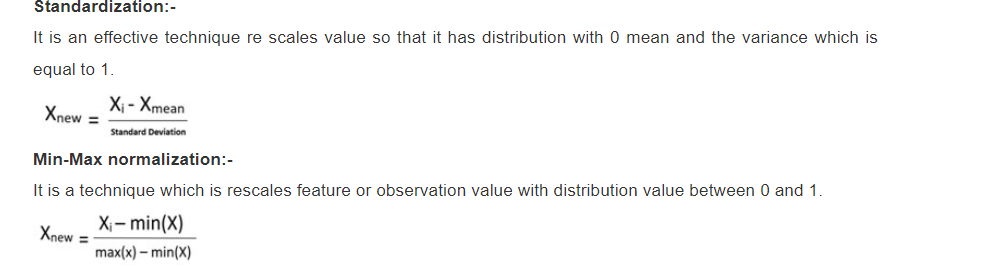